# Ajuste de hiper-parámetros

Cuando trabajamos con modelos de *machine learning* a menudo nos encontramos con que estos disponen de una serie de hiper-parámetros que es necesario ajustar con el fin de lograr que realicen las predicciones más certeras posibles sobre nuestro conjunto de datos. A este paso se le conoce como **hyper-parameters tunning**.

Veamos cómo podemos ajustar los hiper-parámetros de un `RandomForestClassifier`para el conjunto de datos de las caras de Olivetti.

Cargamos las caras:

In [4]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [5]:
X = olivetti.data
y = olivetti.target

El conjunto de datos de las caras de Olivetti busca identificar a 40 personas mediante imágenes de sus rostros.

In [6]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

Algunas de las caras:

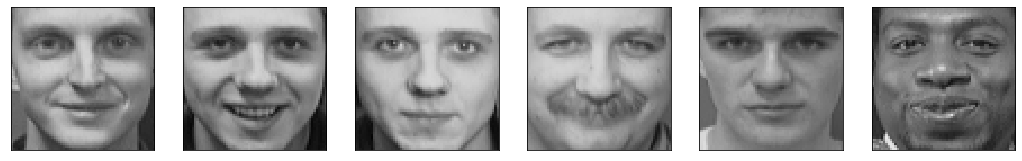

In [7]:
import matplotlib.pyplot as plt
import numpy as np

n_images = 6
image_shape = (64, 64)

random_indices = np.random.choice(X.shape[0], size=n_images, replace=False)
faces = X[random_indices, :]

fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(3*n_images, 3))

for i, comp in enumerate(faces):
    axs[i].imshow(comp.reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest', vmin=0, vmax=1)
    axs[i].set_xticks(())
    axs[i].set_yticks(())

Prepramos el dataset y lo partimos en `train` y `test`:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Optimización de un hiper-parámetro

Si quieremos optimizar un único híper-parametro, lo ideal es analizar cómo se comporta una medida de calidad según evoluciona dicho hiper-parámetro.

Por ejemplo, veamos como varía el *accuracy* al variar el hiper-parámetro `n_estimators`:

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[P

[Parallel(n_jobs=-1)]: Done   4 out of  40 | elapsed:    0.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   2 out of  40 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=40)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   2 out of  40 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=40)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  43 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.2s finished
[Parallel(n_jobs=43)]: Using backend ThreadingBackend with 43 concurrent workers.
[Parallel(n_jobs=43)]: Done   2 out of  43 | elapsed:    0.0s re

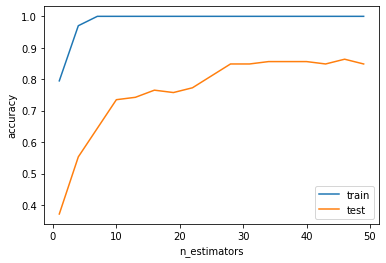

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.arange(1,50,3)
train_scores = np.array([])
test_scores = np.array([])

for n in n_estimators:
  clf = RandomForestClassifier(n_estimators=n, verbose=1, n_jobs=-1, random_state=42).fit(X_train, y_train)
  train_scores = np.append(train_scores, clf.score(X_train, y_train))
  test_scores = np.append(test_scores, clf.score(X_test, y_test))

plt.figure()

plt.plot(n_estimators, train_scores, label="train")
plt.plot(n_estimators, test_scores, label="test")

plt.xlabel('n_estimators')
plt.ylabel('accuracy')

plt.legend()

## Optimización de dos hiper-parámetros

Si queremos comprobar cómo evoluciona el error cuando para las variaciones producidas por dos hiper-parámetros, debemos pintar un mapa de calor en el que se muestre el resultado de evaluar el modelo para las combinaciones de calores de los dos hiper-parámetros.

Veamos como evoluciona el *accuracy* cuando variamos `n_estimators` y `max_depth`:

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent w

[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s re

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 out of  15 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=15)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 out of  15 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=15)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 out of  15 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=15)]: Done  15 out of  15 | elapsed:    0.0s f

[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s fi

[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=30)]: Using backend ThreadingBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done   2 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=30)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=30)]: Using backend ThreadingBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done   2 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=30)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=30)]: Using backend ThreadingBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done   2 out of  30 | elapsed:    0.0s re

[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished
[Parallel(n_jobs=35)]: Using backend ThreadingBackend with 35 concurrent workers.
[Parallel(n_jobs=35)]: Done   2 out of  35 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=35)]: Done  35 out of  35 | elapsed:    0.0s finished
[Parallel(n_jobs=35)]: Using backend ThreadingBackend with 35 concurrent workers.
[Parallel(n_jobs=35)]: Done   2 out of  35 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=35)]: Done  35 out of  35 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=35)]: Using backend ThreadingBackend with 35 concurrent workers.
[Parallel(n_jobs=35)]: Done   2 out of  35 | elapsed:    0.0s re

[Parallel(n_jobs=-1)]: Done   4 out of  40 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   2 out of  40 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=40)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   2 out of  40 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=40)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  40 | elapsed:    0.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   2 out of  40 | elapsed:    0.0s re

[Parallel(n_jobs=-1)]: Done  24 out of  45 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=45)]: Using backend ThreadingBackend with 45 concurrent workers.
[Parallel(n_jobs=45)]: Done   2 out of  45 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=45)]: Done  45 out of  45 | elapsed:    0.0s finished
[Parallel(n_jobs=45)]: Using backend ThreadingBackend with 45 concurrent workers.
[Parallel(n_jobs=45)]: Done   2 out of  45 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=45)]: Done  45 out of  45 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=45)]: Using backend ThreadingBackend with 45 concurrent workers.
[Parallel(n_jobs=45)]: Done   2 out of  45 | elapsed:    0.0s re

[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.1s finished


Text(0.5, 1.0, 'Test')

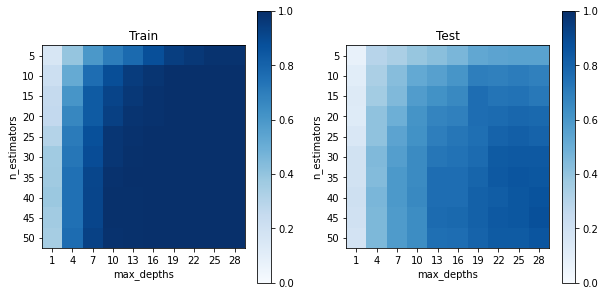

In [10]:
import matplotlib.pyplot as plt

n_estimators = np.arange(5,51,5)
max_depths = np.arange(1,30,3)

train_scores = np.array([])
test_scores = np.array([])

for n in n_estimators:
  for d in max_depths:
    clf = RandomForestClassifier(n_estimators=n, max_depth=d, verbose=1, n_jobs=-1, random_state=42).fit(X_train, y_train)
    train_scores = np.append(train_scores, clf.score(X_train, y_train))
    test_scores = np.append(test_scores, clf.score(X_test, y_test))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# train error 

im0 = axs[0].imshow(train_scores.reshape((len(n_estimators), len(max_depths))), vmin=0, vmax=1, cmap='Blues')
plt.colorbar(im0, ax=axs[0])

axs[0].set_xlabel('max_depths')
axs[0].set_xticks(np.arange(len(max_depths)))
axs[0].set_xticklabels(max_depths)

axs[0].set_ylabel('n_estimators')
axs[0].set_yticks(np.arange(len(n_estimators)))
axs[0].set_yticklabels(n_estimators)

axs[0].set_title('Train')

# test error

im1 = axs[1].imshow(test_scores.reshape((len(n_estimators), len(max_depths))), vmin=0, vmax=1, cmap='Blues')
plt.colorbar(im1, ax=axs[1])

axs[1].set_xlabel('max_depths')
axs[1].set_xticks(np.arange(len(max_depths)))
axs[1].set_xticklabels(max_depths)

axs[1].set_ylabel('n_estimators')
axs[1].set_yticks(np.arange(len(n_estimators)))
axs[1].set_yticklabels(n_estimators)

axs[1].set_title('Test')

## Optimización de múltiples hiper-parámetros

Para analizar qué sucede con más de dos hiper-parámetros, no podemos pintar ningún tipo de gráfico al tener más de tres dimensiona a representar (dos para los hiper-parámetros y una para el error). Por ello, en lugar de representar gráficamente el error lo hacemos de forma tabulada.

[`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) es una excelente herramienta que prueba de forma exahstiva todas las combinaciones de hiper-parámetros para unos rangos pre-seleccionados.

In [11]:
from sklearn.model_selection import GridSearchCV

parameters = {
  'n_estimators': np.arange(5,51,10),
  'max_depth': np.arange(1,30,5),
  'criterion': ('gini', 'entropy')
}

rf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rf, parameters, verbose=1, n_jobs=-1, cv=3)
gs.fit(X, y)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([ 1,  6, 11, 16, 21, 26]),
                         'n_estimators': array([ 5, 15, 25, 35, 45])},
             verbose=1)

In [12]:
import pandas as pd
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
24,1.202499,0.017685,0.011957,0.004209,gini,21,45,"{'criterion': 'gini', 'max_depth': 21, 'n_esti...",0.902985,0.864662,0.872180,0.879942,0.016580,1
29,1.298857,0.006651,0.013640,0.001084,gini,26,45,"{'criterion': 'gini', 'max_depth': 26, 'n_esti...",0.902985,0.864662,0.864662,0.877436,0.018066,2
28,1.042816,0.033868,0.011310,0.000284,gini,26,35,"{'criterion': 'gini', 'max_depth': 26, 'n_esti...",0.880597,0.857143,0.857143,0.864961,0.011056,3
54,1.932889,0.140717,0.008027,0.001253,entropy,21,45,"{'criterion': 'entropy', 'max_depth': 21, 'n_e...",0.843284,0.857143,0.887218,0.862548,0.018339,4
49,2.010624,0.025352,0.007800,0.001488,entropy,16,45,"{'criterion': 'entropy', 'max_depth': 16, 'n_e...",0.843284,0.857143,0.887218,0.862548,0.018339,4
44,2.156206,0.053442,0.009889,0.002057,entropy,11,45,"{'criterion': 'entropy', 'max_depth': 11, 'n_e...",0.843284,0.857143,0.887218,0.862548,0.018339,4
59,2.100927,0.066276,0.008035,0.001844,entropy,26,45,"{'criterion': 'entropy', 'max_depth': 26, 'n_e...",0.843284,0.857143,0.887218,0.862548,0.018339,4
23,0.963433,0.004178,0.010144,0.000232,gini,21,35,"{'criterion': 'gini', 'max_depth': 21, 'n_esti...",0.865672,0.842105,0.857143,0.854973,0.009742,8
39,2.093842,0.062732,0.008559,0.001432,entropy,6,45,"{'criterion': 'entropy', 'max_depth': 6, 'n_es...",0.820896,0.842105,0.872180,0.845060,0.021041,9
38,1.775021,0.055238,0.006084,0.000246,entropy,6,35,"{'criterion': 'entropy', 'max_depth': 6, 'n_es...",0.805970,0.842105,0.864662,0.837579,0.024174,10


El problema de *Grid Search* es que es profundamente explorativo, por lo que los tiempos de ejecución suelen dispararse. Como alternativa disponemos de [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) que selecciona aleatoriamente combinaciones de hiper-parámetros dentro del rango elegido.

In [13]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
  'n_estimators': np.arange(5,51,5),
  'max_depth': np.arange(1,30,3),
  'criterion': ('gini', 'entropy')
}

rf =  RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, parameters, n_iter=10, verbose=1, n_jobs=-1, cv=3)
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])},
                   verbose=1)

In [14]:
import pandas as pd
pd.DataFrame(rs.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,0.805388,0.011892,0.004741,0.000375,40,16,entropy,"{'n_estimators': 40, 'max_depth': 16, 'criteri...",0.811111,0.820225,0.876404,0.835913,0.028872,1
1,0.519964,0.001395,0.005367,0.000194,45,28,gini,"{'n_estimators': 45, 'max_depth': 28, 'criteri...",0.766667,0.853933,0.831461,0.817353,0.036996,2
2,0.323715,0.011399,0.004195,0.000044,25,28,gini,"{'n_estimators': 25, 'max_depth': 28, 'criteri...",0.755556,0.820225,0.808989,0.794923,0.028212,3
4,0.364326,0.031543,0.004406,0.000174,35,16,gini,"{'n_estimators': 35, 'max_depth': 16, 'criteri...",0.700000,0.808989,0.764045,0.757678,0.044722,4
0,0.374071,0.003288,0.005328,0.000186,45,13,gini,"{'n_estimators': 45, 'max_depth': 13, 'criteri...",0.688889,0.741573,0.820225,0.750229,0.053966,5
7,0.376245,0.020167,0.002619,0.000221,15,28,entropy,"{'n_estimators': 15, 'max_depth': 28, 'criteri...",0.700000,0.629213,0.764045,0.697753,0.055068,6
9,0.313372,0.018926,0.004768,0.000324,35,10,gini,"{'n_estimators': 35, 'max_depth': 10, 'criteri...",0.588889,0.719101,0.685393,0.664461,0.055181,7
8,0.206293,0.020990,0.005358,0.000151,40,4,gini,"{'n_estimators': 40, 'max_depth': 4, 'criterio...",0.433333,0.528090,0.516854,0.492759,0.042270,8
3,0.096490,0.009081,0.005301,0.000564,35,1,gini,"{'n_estimators': 35, 'max_depth': 1, 'criterio...",0.255556,0.280899,0.269663,0.268706,0.010368,9
6,0.032668,0.003445,0.002101,0.000261,10,1,gini,"{'n_estimators': 10, 'max_depth': 1, 'criterio...",0.166667,0.179775,0.179775,0.175406,0.006179,10


# Optimización de hiper-parámetros con Nevergrad

[Nevergrad](https://facebookresearch.github.io/nevergrad/index.html) es una librería de optimización numérica de código abierto desarrollada por **Facebook**. Aunque puede utilizarse para resolver cualquier problema de optimización, está diseñada para realizar una optimización de hiper-parámetros cuando estamos ajustando un modelo.

A diferencia de `GridSearch`, **Nevergrad** no realiza una búsqueda exhaustiva sobre todas las combinaciones posibles de valores, sino que utiliza metaheurísticas tales como los algoritmos evolutivos y sus variantes.

In [2]:
!pip install nevergrad

Un ejemplo rápido del funcionamiento de la librería sería optimizar una función bidimensional:

In [3]:
import nevergrad as ng

def square(x):
    return sum((x - 0.5) ** 2)

# optimization on x as an array of shape (2,)
optimizer = ng.optimizers.NGOpt(parametrization=2, budget=100)
recommendation = optimizer.minimize(square)  # best value
print(recommendation.value)

[0.50000001 0.50000003]


Vamos a optimizar los hiper-parámetros del modelo anterior, pero usando esta vez la librería **Nevergrad**. Para que funcione, necesitamos una función de evaluación para medir la calidad de un conjunto determinado de hiper-parámetros. Para ello encapsulamos la construcción del modelo junto con la evaluación del mismo (usaremos *F1-score*):

In [21]:
from sklearn.metrics import f1_score

def create_and_eval_rf(n_estimators, max_depth, criterion, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   criterion=criterion,
                                   random_state=42)
    model.fit(X_train, y_train)
    score = f1_score(y_test, model.predict(X_test), average='weighted')
    print(f"F1-score: {score}")
    return -score


Como podemos observar, los hiper-parámetros del modelo son los siguientes:

- `n_estimators`: número de árboles de decisión a ajustar.
- `max_depth`: profundidad máxima de cada árbol.
- `criterion`: criterio de selección del punto de corte.

**Nevergrad** denomina **intrumentalización** a la definición de los hiper-parámetros. Observa que los nombres de los parámetros de la instrumentalización coinciden con los parámetros de la función de evaluación. También es necesario elegir uno de los [optimizadores](https://facebookresearch.github.io/nevergrad/optimizers_ref.html#optimizers) que vienen incluidos en **Nevergrad**.

Por último, bastará con ejecutar la meta-optimización consistente en minimizar la función de evaluación que hemos definido anteriormente.

In [22]:
import nevergrad as ng

n_estimators = ng.p.TransitionChoice(range(10, 100, 10))
max_depth = ng.p.TransitionChoice([3, 4, 5])
criterion = ng.p.Choice(['gini', 'entropy'])

params = ng.p.Instrumentation(n_estimators, max_depth, criterion)
optimizer = ng.optimizers.TwoPointsDE(parametrization=params, budget=100)
best = optimizer.minimize(create_and_eval_rf, batch_mode=False)

F1-score: 0.6446193537102629
F1-score: 0.7714897896716079
F1-score: 0.40593282979646617
F1-score: 0.7714897896716079
F1-score: 0.5516886943023306
F1-score: 0.5562109187109188
F1-score: 0.3255798242161878
F1-score: 0.39399295990205085
F1-score: 0.5466191067795346
F1-score: 0.5251825615461979
F1-score: 0.3047309172309172
F1-score: 0.49305774192137825
F1-score: 0.6950730246184791
F1-score: 0.5323593073593074
F1-score: 0.504589181861909
F1-score: 0.3255798242161878
F1-score: 0.29242642879006514
F1-score: 0.7867883379247016
F1-score: 0.7106186322095412
F1-score: 0.7944592024137479
F1-score: 0.40593282979646617
F1-score: 0.6488215488215489
F1-score: 0.7348435655253837
F1-score: 0.3353666535484718
F1-score: 0.6602152477152478
F1-score: 0.35961290393108575
F1-score: 0.6921689842144387
F1-score: 0.49305774192137825
F1-score: 0.6883002098911191
F1-score: 0.39399295990205085
F1-score: 0.3896284271284271
F1-score: 0.3116467707376798
F1-score: 0.3047309172309172
F1-score: 0.7714897896716079
F1-scor

In [23]:
best.value

((90, 5, 'entropy'), {})

---

Creado por **Fernando Ortega** (fernando.ortega@upm.es) y **Raúl Lara-Cabrera** (raul.lara@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">